# Solución la tarea 5: REDES NEURONALES PARA CLASIFICACIÓN EN PYTHON

## Preliminares

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()

Saving asriosgu_fetal2020.csv to asriosgu_fetal2020.csv


## Punto 1

In [ ]:
import io
tabla = pd.read_csv(io.BytesIO(uploaded['asriosgu_fetal2020.csv']), sep = ",", index_col=0, encoding='latin-1')
tabla.head(4)

<ipython-input-3-62bd0ea319fd>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  tabla = pd.read_csv(io.BytesIO(uploaded['asriosgu_fetal2020.csv']), sep = ",", index_col=0, encoding='latin-1')


,COD_MUNIC,A_DEFUN,SIT_DEFUN,OTRSITIODE,TIPO_DEFUN,ANO,MES,HORA,MINUTOS,SEXO,...,C_MUERTEB,C_MUERTEC,C_MUERTED,C_MUERTEE,ASIS_MED,CAUSA_MULT,C_BAS1,CAUSA_667,IDPROFCER,CAU_HOMOL
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
70,1,1,1,NaN,1,2020,5,0,0,3,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80
11,1,1,1,NaN,1,2020,5,0,0,3,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80
11,1,1,1,NaN,1,2020,5,0,0,1,...,1.0,NaN,NaN,NaN,1,P059/P011,P011,402,1,80
11,1,1,1,NaN,1,2020,5,0,0,3,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80


In [ ]:
df = tabla[["SEXO", "P_PMAN_IRIS", "PESO_NAC", "T_GES"]]
df["P_PMAN_IRIS"] = df.P_PMAN_IRIS.astype(str)
df.head(4)

<ipython-input-4-34b7e6819ba8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["P_PMAN_IRIS"] = df.P_PMAN_IRIS.astype(str)


,SEXO,P_PMAN_IRIS,PESO_NAC,T_GES
COD_DPTO,,,,
70,3,nan,9,1
11,3,0.0,1,1
11,1,0.0,1,2
11,3,nan,1,1


In [ ]:
df.loc[(df.P_PMAN_IRIS == "nan"), 'P_PMAN_IRIS'] = "6"
df.head(2)

,SEXO,P_PMAN_IRIS,PESO_NAC,T_GES
COD_DPTO,,,,
70,3,6,9,1
11,3,0.0,1,1


In [ ]:
df["P_PMAN_IRIS"] = df.P_PMAN_IRIS.astype(float)
df.loc[(df.P_PMAN_IRIS == "6"), 'P_PMAN_IRIS'] = "6.0"

<ipython-input-6-e6ad58b1b17b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["P_PMAN_IRIS"] = df.P_PMAN_IRIS.astype(float)


In [ ]:
df["PESO_NAC"] = df.PESO_NAC.astype(str)
df.loc[(df.PESO_NAC == "3"), 'PESO_NAC'] = "< 1.5-2 Kg"
df.loc[(df.PESO_NAC == "1"), 'PESO_NAC'] = "< 1 Kg"
df.loc[(df.PESO_NAC == "2"), 'PESO_NAC'] = "1-1.5 Kg"
df.loc[(df.PESO_NAC == "4"), 'PESO_NAC'] = "2-2.5 Kg"
df.loc[(df.PESO_NAC == "5"), 'PESO_NAC'] = "2.5-3 Kg"
df.loc[(df.PESO_NAC == "6"), 'PESO_NAC'] = "3-3.5 Kg"
df.loc[(df.PESO_NAC == "7"), 'PESO_NAC'] = "3.5-4 Kg"
df.loc[(df.PESO_NAC == "8"), 'PESO_NAC'] = "> 4 Kg"
df.loc[(df.PESO_NAC == "9"), 'PESO_NAC'] = "Kg desco"
print(df)

          SEXO P_PMAN_IRIS    PESO_NAC  T_GES
COD_DPTO                                     
70           3         6.0    Kg desco      1
11           3         0.0      < 1 Kg      1
11           1         0.0      < 1 Kg      2
11           3         6.0      < 1 Kg      1
11           2         6.0  < 1.5-2 Kg      3
...        ...         ...         ...    ...
41           3         6.0      < 1 Kg      1
11           3         6.0    Kg desco      1
11           3         0.0    Kg desco      1
76           3         6.0      < 1 Kg      1
11           3         0.0      < 1 Kg      1

[33327 rows x 4 columns]


<ipython-input-7-ed72fc39c3de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["PESO_NAC"] = df.PESO_NAC.astype(str)


In [ ]:
x = df.drop("PESO_NAC", axis=1)
y = df["PESO_NAC"]
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.3)
trainX

,SEXO,P_PMAN_IRIS,T_GES
COD_DPTO,,,
11,2,6.0,4
5,3,6.0,1
11,3,6.0,1
11,3,6.0,1
15,3,6.0,1
...,...,...,...
68,3,6.0,1
76,3,6.0,1
5,3,6.0,1


### Creación de la matriz Dummie

In [ ]:
dummi1 = pd.get_dummies(x['SEXO'], dtype=float)
dummi1.columns = ['Masc', 'Fem', 'Desc']
dummi2 = pd.get_dummies(x['P_PMAN_IRIS'], dtype=float)
dummi2.columns = ["Natural", "Homicidio", "Accidente", "Pendiente", "Indeterminado", "Desconocido"]
dummi3 = pd.get_dummies(x['T_GES'], dtype=float)
dummi3.columns = ["< 22 sem", "22-27 sem", "28-37 sem", "38-41 sem", "> 42 sem", "Sin info"]
dummi = pd.concat([dummi1, dummi2, dummi3, y], axis=1)
dummi.head(4)

<ipython-input-10-8a7cd2abb3a3>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummi2 = pd.get_dummies(x['P_PMAN_IRIS'], dtype=float)


,Masc,Fem,Desc,Natural,Homicidio,Accidente,Pendiente,Indeterminado,Desconocido,< 22 sem,22-27 sem,28-37 sem,38-41 sem,> 42 sem,Sin info,PESO_NAC
COD_DPTO,,,,,,,,,,,,,,,,
70,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,Kg desco
11,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,< 1 Kg
11,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,< 1 Kg
11,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,< 1 Kg


In [ ]:
x1 = dummi.drop("PESO_NAC", axis=1)
y1 = dummi["PESO_NAC"]
train1, test1, train2, test2 = train_test_split(x1, y1, test_size = 0.3)
train1

,Masc,Fem,Desc,Natural,Homicidio,Accidente,Pendiente,Indeterminado,Desconocido,< 22 sem,22-27 sem,28-37 sem,38-41 sem,> 42 sem,Sin info
COD_DPTO,,,,,,,,,,,,,,,
86,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
85,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
76,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
11,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


## Punto 2

\> Capas = sample(3:24, size = 1) \\
[1] 7 \\
\> Nodos = sample(3:24, size = 1) \\
[1] 8

In [ ]:
mlp_clf1 = MLPClassifier(hidden_layer_sizes=(8,8,8,8,8,8,8),
                         max_iter = 500,activation = 'relu',
                         solver = 'adam')
df.head(4)
mlp_clf1.fit(train1, train2)

MLPClassifier(hidden_layer_sizes=(8, 8, 8, 8, 8, 8, 8), max_iter=500)

## Punto 3

In [ ]:
y_pred1 =  pd.DataFrame(mlp_clf1.predict(test1))
y_pred1.columns = ["aa"]
print('Exactitud: {:.2f}'.format(accuracy_score(test2, y_pred1)))

Exactitud: 0.75


In [ ]:
from sklearn.metrics import confusion_matrix
import pylab as pl
cm = confusion_matrix(testY, y_pred1)

Text(0.5, 1.0, 'Confusion Matrix')

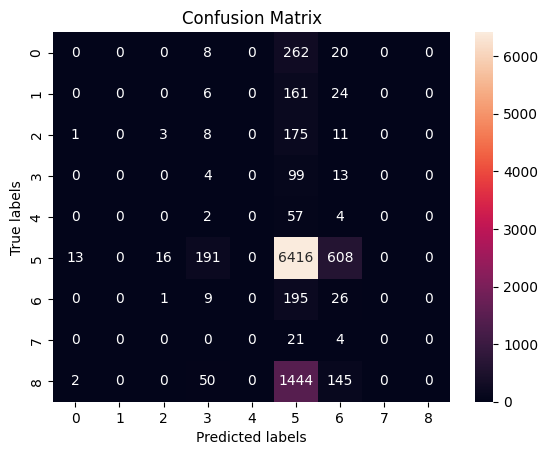

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')

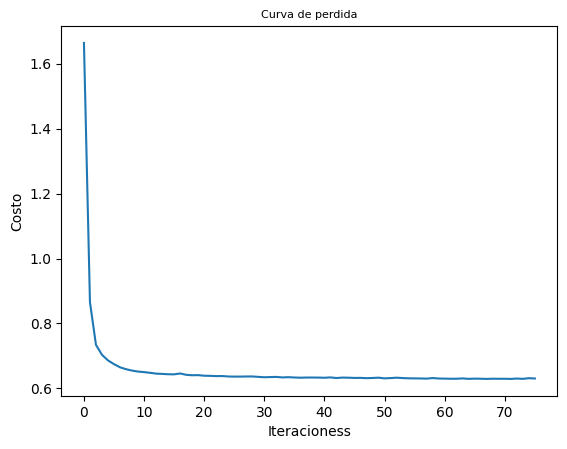

In [ ]:
plt.plot(mlp_clf1.loss_curve_)
plt.title("Curva de perdida", fontsize=8)
plt.xlabel('Iteracioness')
plt.ylabel('Costo')
plt.show()

Con ayuda de la amtriz de confusión, la exactitud de la predicción y la curva de perdida se nota que el modelo no es adecuado para los datos que se tienen, pues en la matriz de confusión se encuentra en la diagonal en su mayoria de ceros y el ajuste es solamente de 75% y el modelo se ajusta de buena manera en el intervalo de peso 2.5 - 3 kg

## Punto 4

Supongamos que un bebé es considerado con bajo peso si al momento de su muerte tiene un peso <2 kg

In [ ]:
train1.head(2)

,Masc,Fem,Desc,Natural,Homicidio,Accidente,Pendiente,Indeterminado,Desconocido,< 22 sem,22-27 sem,28-37 sem,38-41 sem,> 42 sem,Sin info
COD_DPTO,,,,,,,,,,,,,,,
86,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
85,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
obs = np.array([[1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])
mlp_clf1.predict(obs)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['< 1 Kg'], dtype='<U10')

In [ ]:
obs1 = np.array([[0, 1, 0, 0, 1, 0, 0, 0, 0,0, 0, 1, 0, 0, 0]])
mlp_clf1.predict(obs1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['< 1.5-2 Kg'], dtype='<U10')

In [ ]:
obs2 = np.array([[0, 0, 1, 0, 0, 0, 0, 1, 0,0, 0, 0, 0, 0, 1]])
mlp_clf1.predict(obs2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['< 1 Kg'], dtype='<U10')

In [ ]:
obs3 = np.array([[0, 0, 1, 0, 0, 1, 0, 0, 0,0, 0, 0, 1, 0, 0]])
mlp_clf1.predict(obs3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['2.5-3 Kg'], dtype='<U10')

In [ ]:
obs4 = np.array([[1, 0, 0, 0, 0, 0, 0, 1, 0,0, 1, 0, 0, 0, 0]])
mlp_clf1.predict(obs4)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array(['< 1 Kg'], dtype='<U10')

In [ ]:
df.PESO_NAC.unique()

array(['Kg desco', '< 1 Kg', '< 1.5-2 Kg', '3.5-4 Kg', '1-1.5 Kg',
       '2.5-3 Kg', '2-2.5 Kg', '3-3.5 Kg', '> 4 Kg'], dtype=object)

## Punto 5

In [ ]:
mlp_clf2 = MLPClassifier(hidden_layer_sizes=(8,8,8,8,8,8,8,8,8,8,8,8,8,8),
                         max_iter = 500,activation = 'relu',
                         solver = 'adam')
df.head(4)
mlp_clf2.fit(train1, train2)

MLPClassifier(hidden_layer_sizes=(8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8),
              max_iter=500)

In [ ]:
y_pred2 =  pd.DataFrame(mlp_clf2.predict(test1))
y_pred2.columns = ["aa"]
print('Exactitud: {:.2f}'.format(accuracy_score(test2, y_pred2)))

Exactitud: 0.75


In [ ]:
cm1 = confusion_matrix(testY, y_pred2)

Text(0.5, 1.0, 'Confusion Matrix')

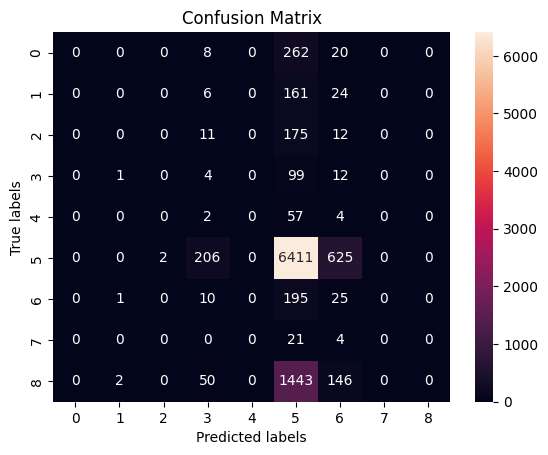

In [ ]:
ax1 = plt.subplot()
sns.heatmap(cm1, annot=True, fmt='g', ax = ax1);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax1.set_xlabel('Predicted labels');ax1.set_ylabel('True labels');
ax1.set_title('Confusion Matrix')

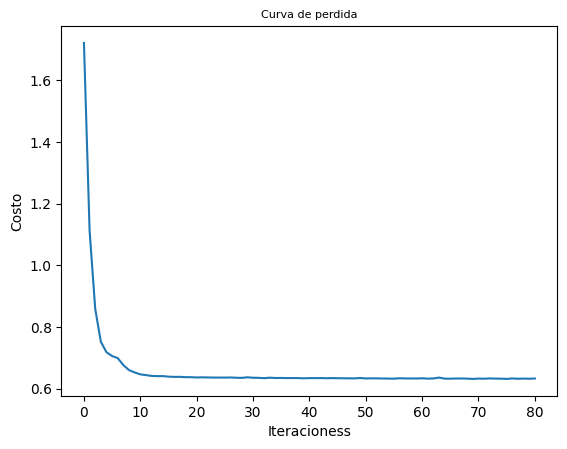

In [ ]:
plt.plot(mlp_clf2.loss_curve_)
plt.title("Curva de perdida", fontsize=8)
plt.xlabel('Iteracioness')
plt.ylabel('Costo')
plt.show()

Con ayuda de la amtriz de confusión, la exactitud de la predicción y la curva de perdida se nota que el modelo no es adecuado para los datos que se tienen, pues en la matriz de confusión se encuentra en la diagonal en su mayoria de ceros y el ajuste es solamente de 75% y el modelo se ajusta de buena manera en el intervalo de peso 2.5 - 3 kg